<a href="https://colab.research.google.com/github/gagabriela2787/Grupo7ISPC/blob/SilviaCarinaMonzon/TPGrupo7Nacidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Cargar archivos CSV
df = pd.read_csv('nacidos-vivos-registrados-2018_deis.csv',header=0, sep=",")

In [ ]:
# Limpieza de datos:
# Eliminar filas con jurisdiccion_de_residencia_nombre == 'Otro país'
# Eliminar filas con sexo_nombre == 'Sin espeficar'
#


In [3]:
# Mostrar valores unicos de provincia
df['jurisdiccion_de_residencia_nombre'].unique()


array(['Formosa', 'Ciudad Aut. de Buenos Aires', 'Buenos Aires',
       'Santa Fe', 'San Luis', 'Lugar no especificado', 'Salta',
       'Neuquén', 'Río Negro', 'Misiones', 'Tucumán', 'Santa Cruz',
       'Catamarca', 'Santiago del Estero', 'Chaco', 'La Rioja',
       'La Pampa', 'Jujuy', 'Entre Ríos', 'Mendoza', 'Chubut',
       'Corrientes', 'Córdoba', 'San Juan', 'Tierra del Fuego',
       'Otro país'], dtype=object)

In [4]:
# Ejecutar éste Codigo para crear un dataframe con letra y nombre
# de cada provincia
Letra=["B","C","K","H","U","X","W","E","P","Y","L","F","M","N","Q","R","A","J","D","Z","S","G","V","T"]
Nombre=["Buenos Aires","Ciudad Aut. de Buenos Aires","Catamarca","Chaco","Chubut",
        "Córdoba","Corrientes","Entre Ríos","Formosa","Jujuy",
        "La Pampa","La Rioja","Mendoza","Misiones","Neuquén",
        "Río Negro","Salta","San Juan","San Luis","Santa Cruz",
        "Santa Fe","Santiago del Estero","Tierra del Fuego","Tucumán"]
df_Letra=pd.DataFrame(
    {"Letra": Letra,
     "Nombre": Nombre})
print(df_Letra)


   Letra                       Nombre
0      B                 Buenos Aires
1      C  Ciudad Aut. de Buenos Aires
2      K                    Catamarca
3      H                        Chaco
4      U                       Chubut
5      X                      Córdoba
6      W                   Corrientes
7      E                   Entre Ríos
8      P                      Formosa
9      Y                        Jujuy
10     L                     La Pampa
11     F                     La Rioja
12     M                      Mendoza
13     N                     Misiones
14     Q                      Neuquén
15     R                    Río Negro
16     A                        Salta
17     J                     San Juan
18     D                     San Luis
19     Z                   Santa Cruz
20     S                     Santa Fe
21     G          Santiago del Estero
22     V             Tierra del Fuego
23     T                      Tucumán


In [5]:
# Unir dataframe df_letra y df,
#------------------------------------------------

df_Union = pd.merge(left=df_Letra, right=df, how="inner", left_on="Nombre", right_on="jurisdiccion_de_residencia_nombre")
df_Union.head()

,Letra,Nombre,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
0,B,Buenos Aires,6,Buenos Aires,1,Simple,1,Varón,5,30 a 34,8,Sin especificar,7,Terciaria/Universitaria Comple,4,1500 a 1999,1
1,B,Buenos Aires,6,Buenos Aires,2,Múltiple,1,Varón,2,15 a 19,5,32 a 36,5,Secundaria/Polimodal Completa,3,1000 a 1499,1
2,B,Buenos Aires,6,Buenos Aires,2,Múltiple,2,Mujer,5,30 a 34,6,37 a 41,3,Primaria/C. EGB Completa,7,3000 a 3499,3
3,B,Buenos Aires,6,Buenos Aires,1,Simple,9,Sin espeficar,4,25 a 29,5,32 a 36,3,Primaria/C. EGB Completa,7,3000 a 3499,2
4,B,Buenos Aires,6,Buenos Aires,2,Múltiple,2,Mujer,8,De 45 y más,3,24 a 27,8,Sin especificar,4,1500 a 1999,1


B    4320
C    1828
S    1699
W    1629
X    1597
H    1554
T    1541
A    1392
N    1363
E    1300
M    1185
G    1174
P     924
R     913
Y     859
D     834
J     832
K     802
Q     776
U     743
F     616
L     520
Z     518
V     402
Name: Letra, dtype: int64


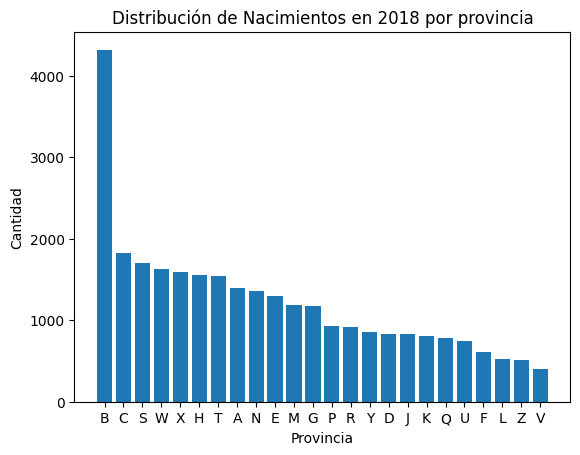

In [6]:
# Explorar la distribución de nacimientos por provincias
prov_count = df_Union["Letra"].value_counts()
print(prov_count)

# Graficar la distribución de nacimientos en 2018 por provincia
plt.bar(prov_count.index, prov_count.values)
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Distribución de Nacimientos en 2018 por provincia')
plt.show()



In [7]:
from pandas._libs.hashtable import value_count
# Explorar la distribución de nacimientos en 2018 por provincias
# Seleccionar los nacimientos de Varón por provincia
varon_count = df_Union[df_Union["sexo_nombre"] == "Varón"]["Letra"].value_counts()
print(varon_count)

# Seleccionar los nacimientos de Mujer por provincia
mujer_count = df_Union[df_Union["sexo_nombre"] == "Mujer"]["Letra"].value_counts()
print(mujer_count)

B    1879
C     928
S     869
W     819
X     791
H     783
T     770
N     703
A     702
E     625
M     592
G     588
R     464
P     460
Y     433
J     416
D     413
K     396
Q     379
U     373
F     307
Z     262
L     257
V     195
Name: Letra, dtype: int64
B    1851
C     892
S     827
X     806
W     803
T     771
H     770
A     687
E     673
N     659
M     589
G     580
P     464
R     449
Y     426
D     421
J     416
K     406
Q     397
U     370
F     299
L     263
Z     256
V     207
Name: Letra, dtype: int64


In [ ]:
from pandas._libs.hashtable import value_count
# Seleccionar todos los nacimientos de Mujer
#df_Union[df_Union["sexo_nombre"] == "Mujer"]

mujer_count = df_Union[df_Union["sexo_nombre"] == "Mujer"]["Letra"].value_counts()
print(mujer_count)

B    1851
C     892
S     827
X     806
W     803
T     771
H     770
A     687
E     673
N     659
M     589
G     580
P     464
R     449
Y     426
D     421
J     416
K     406
Q     397
U     370
F     299
L     263
Z     256
V     207
Name: Letra, dtype: int64


In [ ]:
from pandas._libs.hashtable import value_count
# Seleccionar los nacimientos de Indeterminado por Provincia

indeter_count = df_Union[df_Union["sexo_nombre"] == "Indeterminado"]["Letra"].value_counts()
print(indeter_count)

F    9
G    6
W    5
M    4
A    3
S    3
H    1
E    1
Name: Letra, dtype: int64


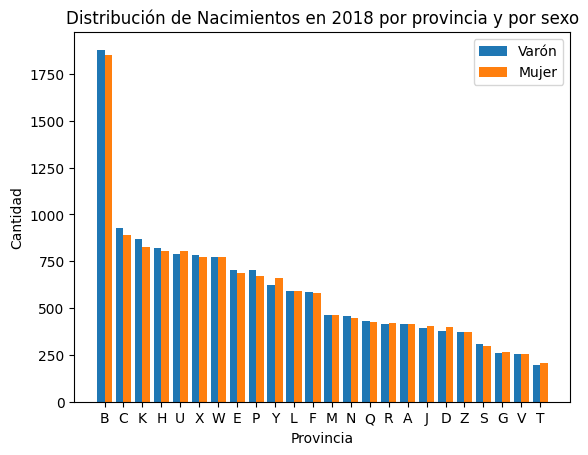

In [8]:
# Graficar la distribución de nacimientos en 2018 por provincia
co = np.arange(len(df_Letra))
an = 0.40

# Definir lugar donde se realiza la gráfica y asignar parámetros
fig, ax = plt.subplots()

ax.bar(co - an/2, varon_count, an, label= 'Varón')
ax.bar(co + an/2, mujer_count, an, label= 'Mujer')

ax.set_title('Distribución de Nacimientos en 2018 por provincia y por sexo')
ax.set_xlabel('Provincia')
ax.set_ylabel('Cantidad')
ax.set_xticks(co)
ax.set_xticklabels(df_Letra["Letra"])

# Para asignar valores contados por encima de la barra
#for i,j in zip(co, varon_count):
#  ax.annotate(j, xy=(i - 0.2, j + 0.2))

#for i,j in zip(co, mujer_count):
#  ax.annotate(j, xy=(i + 0.2, j + 0.2))

plt.legend()
plt.show()

In [ ]:
df['tipo_de_parto_id'].unique()
#df['tipo_de_parto_nombre'].unique()

array([1, 2, 9])

In [19]:
df[(df["tipo_de_parto_id"] == 9) & (df["cantidad_nacimientos"] > 0)]

,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
209,30,Entre Ríos,9,Sin especificar,1,Varón,3,20 a 24,5,32 a 36,6,Terciaria/Universitaria Incomp,3,1000 a 1499,1
287,22,Chaco,9,Sin especificar,2,Mujer,4,25 a 29,6,37 a 41,4,Secundaria/Polimodal Incomplet,7,3000 a 3499,1
345,22,Chaco,9,Sin especificar,1,Varón,5,30 a 34,6,37 a 41,5,Secundaria/Polimodal Completa,7,3000 a 3499,2
560,22,Chaco,9,Sin especificar,1,Varón,3,20 a 24,6,37 a 41,4,Secundaria/Polimodal Incomplet,7,3000 a 3499,1
630,22,Chaco,9,Sin especificar,2,Mujer,3,20 a 24,6,37 a 41,5,Secundaria/Polimodal Completa,7,3000 a 3499,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29346,6,Buenos Aires,9,Sin especificar,9,Sin espeficar,4,25 a 29,6,37 a 41,4,Secundaria/Polimodal Incomplet,9,Sin especificar,1
29964,22,Chaco,9,Sin especificar,2,Mujer,4,25 a 29,6,37 a 41,5,Secundaria/Polimodal Completa,7,3000 a 3499,2
30015,18,Corrientes,9,Sin especificar,2,Mujer,3,20 a 24,6,37 a 41,3,Primaria/C. EGB Completa,7,3000 a 3499,1
30073,99,Lugar no especificado,9,Sin especificar,1,Varón,9,Sin especificar,8,Sin especificar,8,Sin especificar,6,2500 a 2999,1


In [21]:
df[df["sexo"] == 3]

,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
3905,82,Santa Fe,1,Simple,3,Indeterminado,4,25 a 29,6,37 a 41,6,Terciaria/Universitaria Incomp,6,2500 a 2999,1
4415,18,Corrientes,1,Simple,3,Indeterminado,5,30 a 34,6,37 a 41,2,Primaria/C. EGB Incompleta,7,3000 a 3499,1
5525,18,Corrientes,1,Simple,3,Indeterminado,2,15 a 19,5,32 a 36,3,Primaria/C. EGB Completa,4,1500 a 1999,1
7247,18,Corrientes,1,Simple,3,Indeterminado,2,15 a 19,6,37 a 41,4,Secundaria/Polimodal Incomplet,8,De 3500 y más,1
8544,86,Santiago del Estero,1,Simple,3,Indeterminado,4,25 a 29,6,37 a 41,7,Terciaria/Universitaria Comple,8,De 3500 y más,1
9540,46,La Rioja,1,Simple,3,Indeterminado,3,20 a 24,6,37 a 41,5,Secundaria/Polimodal Completa,8,De 3500 y más,1
10045,46,La Rioja,1,Simple,3,Indeterminado,5,30 a 34,6,37 a 41,5,Secundaria/Polimodal Completa,6,2500 a 2999,1
12907,66,Salta,1,Simple,3,Indeterminado,4,25 a 29,1,Menos de 22,4,Secundaria/Polimodal Incomplet,1,Menor de 500,1
13611,46,La Rioja,1,Simple,3,Indeterminado,6,35 a 39,6,37 a 41,5,Secundaria/Polimodal Completa,7,3000 a 3499,1
14010,50,Mendoza,1,Simple,3,Indeterminado,5,30 a 34,4,28 a 31,7,Terciaria/Universitaria Comple,3,1000 a 1499,1


In [ ]:
df.groupby("sexo").describe()

jurisdiccion_de_residencia_id                                          \
                             count       mean        std   min   25%   50%   
sexo                                                                         
1                          14763.0  43.031972  30.625022   2.0  14.0  38.0   
2                          14646.0  43.029018  30.605795   2.0  14.0  38.0   
3                             32.0  53.625000  23.856763  18.0  46.0  48.0   
9                            658.0  13.927052  25.840174   2.0   6.0   6.0   

                 tipo_de_parto_id            ...  \
       75%   max            count      mean  ...   
sexo                                         ...   
1     70.0  99.0          14763.0  1.221093  ...   
2     70.0  99.0          14646.0  1.229482  ...   
3     82.0  86.0             32.0  1.062500  ...   
9      6.0  99.0            658.0  1.272036  ...   

     Intervalos_de_peso_al_nacer_id      cantidad_nacimientos             \
                                75%  max                count       mean   
sexo                                                                       
1                              7.00  9.0              14763.0  23.588837   
2                              7.00  9.0              14646.0  22.593882   
3                              7.25  8.0                 32.0   1.000000   
9                              8.00  9.0                658.0   9.437690   

                                              
             std  min  25%  50%  75%     max  
sexo                                          
1     128.912903  1.0  1.0  2.0  7.0  4512.0  
2     117.974626  1.0  1.0  2.0  7.0  4140.0  
3       0.000000  1.0  1.0  1.0  1.0     1.0  
9      25.101618  1.0  1.0  2.0  4.0   315.0  

[4 rows x 56 columns]

In [46]:
#df['sexo'].unique()
df['sexo_nombre'].unique()

array(['Mujer', 'Varón', 'Sin espeficar', 'Indeterminado'], dtype=object)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30099 entries, 0 to 30098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   jurisdiccion_de_residencia_id       30099 non-null  int64 
 1   jurisdiccion_de_residencia_nombre   30099 non-null  object
 2   tipo_de_parto_id                    30099 non-null  int64 
 3   tipo_de_parto_nombre                30099 non-null  object
 4   sexo                                30099 non-null  int64 
 5   sexo_nombre                         30099 non-null  object
 6   edad_de_la_madre_grupos_id          30099 non-null  int64 
 7   edad_de_la_madre_grupos_nombre      30099 non-null  object
 8   semanas_de_gestacion_id             30099 non-null  int64 
 9   semanas_de_gestacion_nombre         30099 non-null  object
 10  instruccion_de_la_madre_id          30099 non-null  int64 
 11  instruccion_de_la_madre_nombre      30099 non-null  ob

In [ ]:
df['edad_de_la_madre_grupos_id'].unique()
#df['edad_de_la_madre_grupos_nombre'].unique()

array([4, 7, 5, 6, 3, 2, 9, 8, 1])

In [ ]:
df['semanas_de_gestacion_id'].unique()

array([5, 6, 8, 7, 3, 4, 1, 2])

In [ ]:
df['semanas_de_gestacion_nombre'].unique()

array(['32 a 36', '37 a 41', 'Sin especificar', '42 y más', '24 a 27',
       '28 a 31', 'Menos de 22', '22 a 23'], dtype=object)

In [ ]:
df[df["semanas_de_gestacion_id"] == 5]

,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos


In [ ]:
df['instruccion_de_la_madre_id'].unique()
#df['instruccion_de_la_madre_nombre'].unique()

array([3, 7, 5, 2, 8, 4, 6, 1])

In [ ]:
#df.isnull().sum
df.isnull().any(axis=1).sum()

0

In [45]:
# Estadísticas descriptivas del DataFrame nacidos
df.describe()

,jurisdiccion_de_residencia_id,tipo_de_parto_id,sexo,edad_de_la_madre_grupos_id,semanas_de_gestacion_id,instruccion_de_la_madre_id,Intervalos_de_peso_al_nacer_id,cantidad_nacimientos
count,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000,30099.000000
mean,42.405528,1.226120,1.663610,4.524968,5.487093,4.772351,5.763015,22.771321
std,30.808996,0.739671,1.204007,1.831169,1.155895,1.844638,1.850774,122.235335
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,14.000000,1.000000,1.000000,3.000000,5.000000,3.000000,5.000000,1.000000
50%,38.000000,1.000000,2.000000,4.000000,6.000000,5.000000,6.000000,2.000000
75%,70.000000,1.000000,2.000000,6.000000,6.000000,6.000000,7.000000,7.000000
max,99.000000,9.000000,9.000000,9.000000,8.000000,8.000000,9.000000,4512.000000


In [ ]:
df['cantidad_nacimientos'].unique()

In [44]:
# Mostrar las primeras filas del DataFrame resultante
print(df.head())

   jurisdiccion_de_residencia_id jurisdiccion_de_residencia_nombre  \
0                             34                           Formosa   
1                              2       Ciudad Aut. de Buenos Aires   
2                              6                      Buenos Aires   
3                             82                          Santa Fe   
4                             74                          San Luis   

   tipo_de_parto_id tipo_de_parto_nombre  sexo sexo_nombre  \
0                 1               Simple     2       Mujer   
1                 1               Simple     1       Varón   
2                 1               Simple     1       Varón   
3                 1               Simple     2       Mujer   
4                 1               Simple     1       Varón   

   edad_de_la_madre_grupos_id edad_de_la_madre_grupos_nombre  \
0                           4                        25 a 29   
1                           7                        40 a 44   
2             